In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
df_heart = pd.read_csv('C:\\Users\\Olumide\\Desktop\\data\\heart_2020data.csv')

df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df_heart.shape

(319795, 18)

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df_heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In checking the diabetic variable, we notice some variations.

The above shows "No, Yes, No-borderline diabetes, Yes(during pregnancy). Now since we want to determine if any of this variables would cause diabetes by the slightest chance then we can call borderline diabetes and during pregnacy No.

Also, borderline diabetes medically isn't also enough reason for a doctor to diagnose diabetes. so we can tag it as No.

Hence we would tag into the as No category

In [6]:
df_heart['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [7]:
df_heart['Diabetic'] = df_heart.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' 
                                               or x == 'Yes (during pregnancy)' else x)

df_heart['Diabetic'].value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [8]:
df_heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df_heart = df_heart[df_heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0})

df_heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,75-79,Black,0,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,70-74,White,0,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80 or older,White,1,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,80 or older,White,0,0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,65-69,White,0,1,Good,10.0,0,0,0


## EDA  

#### exploratory data analysis of categorical variables btw the target and features variables

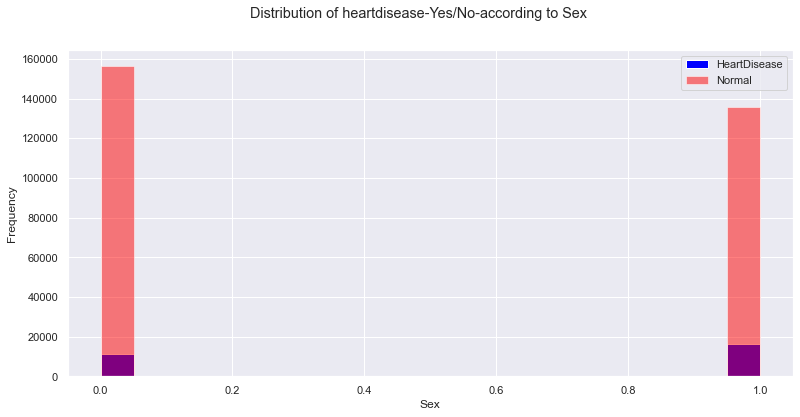

In [10]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['Sex'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['Sex'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to Sex")

ax.legend();

from the above, Men have more Heart diseases cases as they are represented by 1, while most cases without heart disease are women

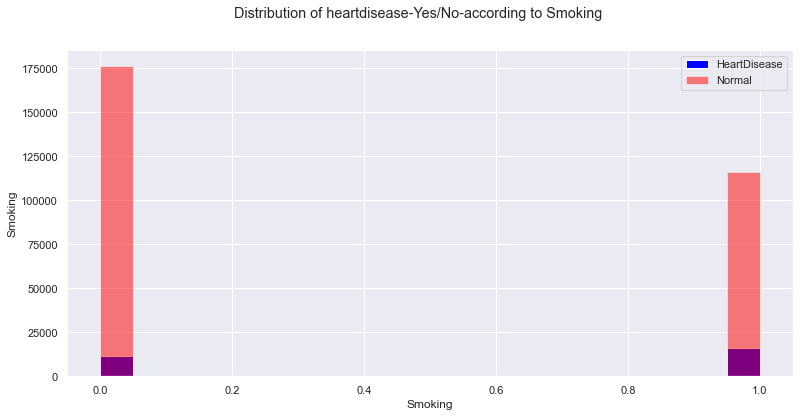

In [11]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['Smoking'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['Smoking'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("Smoking")
ax.set_ylabel("Smoking")

fig.suptitle("Distribution of heartdisease-Yes/No-according to Smoking")

ax.legend();

Those who smoke suffer with a high degree of HeartDisease as indicated in distribution represented by 1

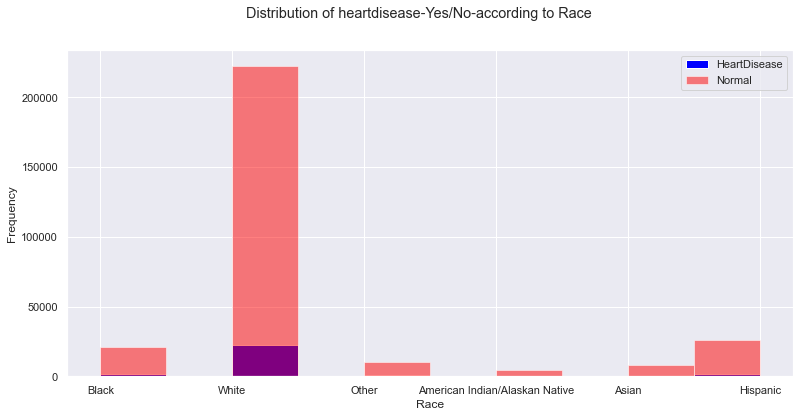

In [12]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['Race'], bins=10, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['Race'], bins=10, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to Race")

ax.legend();

More white people are prone to HeartDiseases compare to the rest of the races

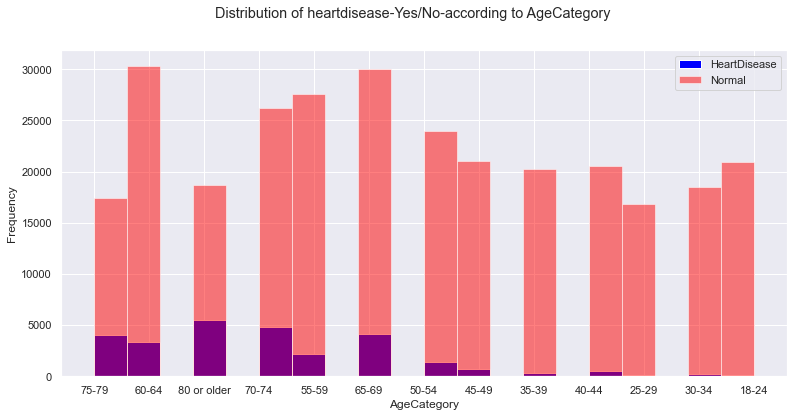

In [13]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['AgeCategory'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['AgeCategory'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to AgeCategory")

ax.legend();

The age category of 80/order are more susceptible to heart diseases, followed by 70-74, and mid-late 60's. This presumes that elderly are more prone to HeartDiseases

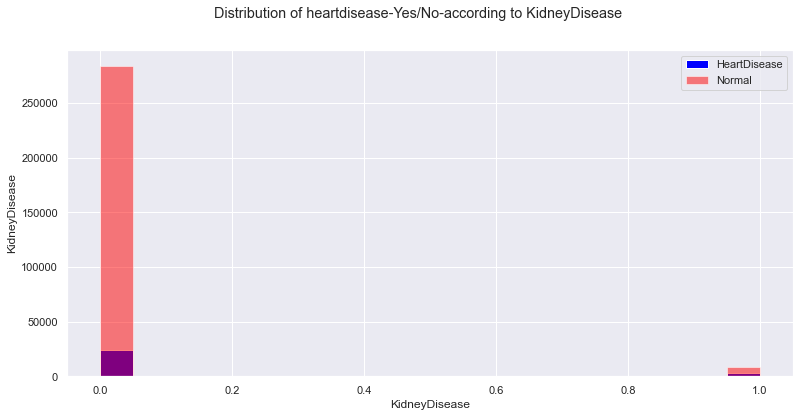

In [14]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['KidneyDisease'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['KidneyDisease'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("KidneyDisease")
ax.set_ylabel("KidneyDisease")

fig.suptitle("Distribution of heartdisease-Yes/No-according to KidneyDisease")

ax.legend();

base on the questions collated on Kidney Disease which was "if you were told you had kideydisease?" majority that answered "No" showed that they went to went on to have heart diseases

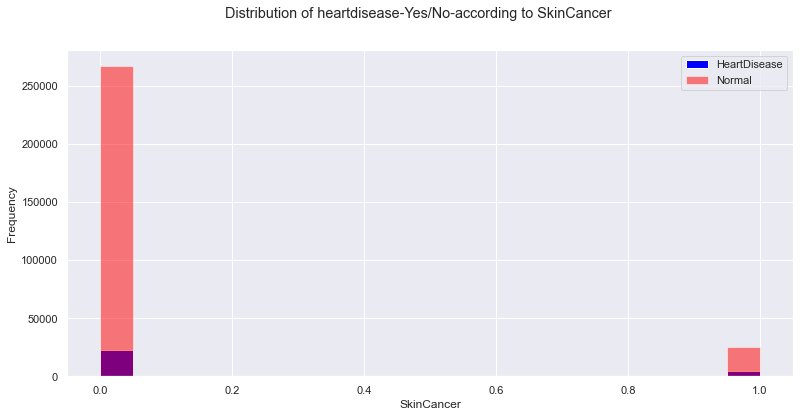

In [15]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['SkinCancer'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['SkinCancer'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to SkinCancer")

ax.legend();

base on the questions collated on Skin Cancer which was "Ever told you had skin cancer?" majority that answered "No" showed that they went to went on to have heart disease

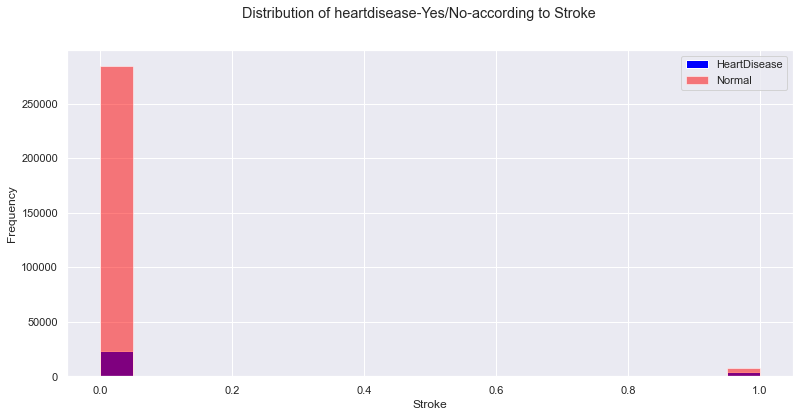

In [16]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['Stroke'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['Stroke'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to Stroke")

ax.legend();

base on the questions collated on Stroke which was "Ever told you had stroker?" those that answered "No" showed that they went to went on to have heart disease

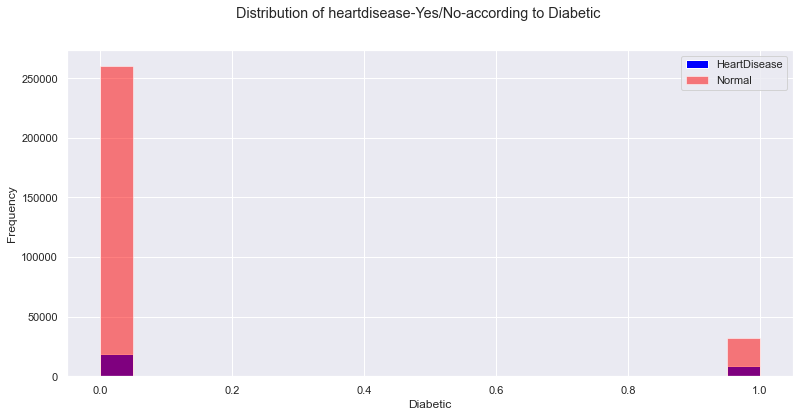

In [17]:
fig, ax = plt.subplots(figsize= (13, 6))

ax.hist(df_heart[df_heart['HeartDisease']==1]['Diabetic'], bins=20, color='blue', label='HeartDisease')

ax.hist(df_heart[df_heart['HeartDisease']==0]['Diabetic'], bins=20, alpha=0.5, color='red', label='Normal')


ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of heartdisease-Yes/No-according to Diabetic")

ax.legend();

### exploratory data analysis  and stats on numerical variable

In [18]:
corr = df_heart.corr().round(2)

corr.head(4)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.00,0.05,0.11,-0.03,0.20,0.17,0.03,0.20,0.07,0.18,-0.10,0.01,0.04,0.15,0.09
BMI,0.05,1.00,0.02,-0.04,0.02,0.11,0.06,0.18,0.03,0.20,-0.15,-0.05,0.09,0.05,-0.03
Smoking,0.11,0.02,1.00,0.11,0.06,0.12,0.09,0.12,0.09,0.06,-0.10,-0.03,0.02,0.03,0.03
AlcoholDrinking,-0.03,-0.04,0.11,1.00,-0.02,-0.02,0.05,-0.04,0.00,-0.06,0.02,-0.01,-0.00,-0.03,-0.01


In [19]:
corr.iloc[0:5, 0:5]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke
HeartDisease,1.00,0.05,0.11,-0.03,0.20
BMI,0.05,1.00,0.02,-0.04,0.02
Smoking,0.11,0.02,1.00,0.11,0.06
AlcoholDrinking,-0.03,-0.04,0.11,1.00,-0.02
Stroke,0.20,0.02,0.06,-0.02,1.00


<AxesSubplot:>

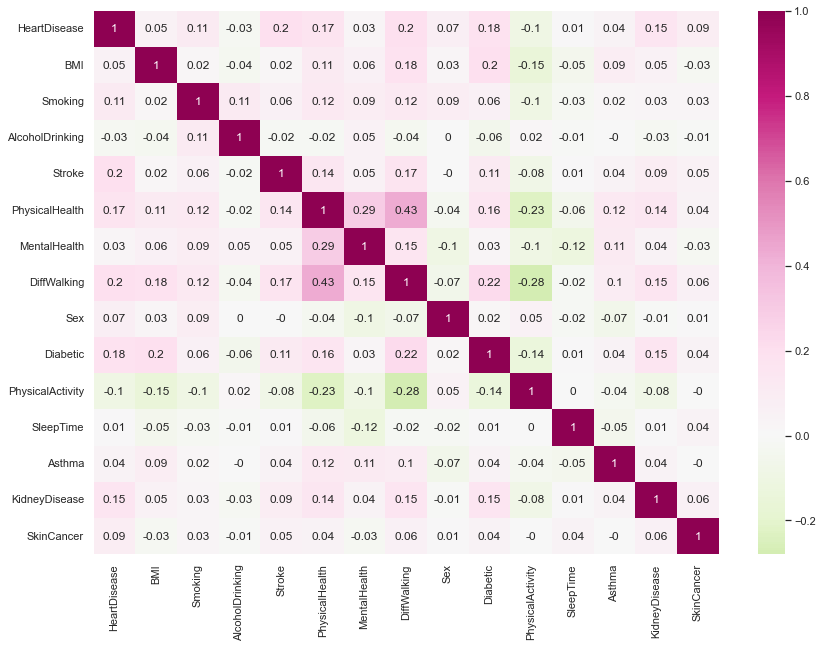

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(corr.round(2), annot=True,cmap='PiYG_r',
            xticklabels=corr.columns.values, #features
           yticklabels=corr.columns.values, #response
           center=0)

**What does this plot tell us? At a high level, if two features, or a feature and the response, are highly correlated with each other, you can say there is a strong association between them. Features that are highly correlated to the response will be good features to use for prediction. This high correlation could be positive or negative**

Notice the **Diabetic** feature is probably the most strongly correlated feature to the response variable. followed by smoking.The other feature that looks like it may be important is **PhysicalActivity**, which is negatively correlated

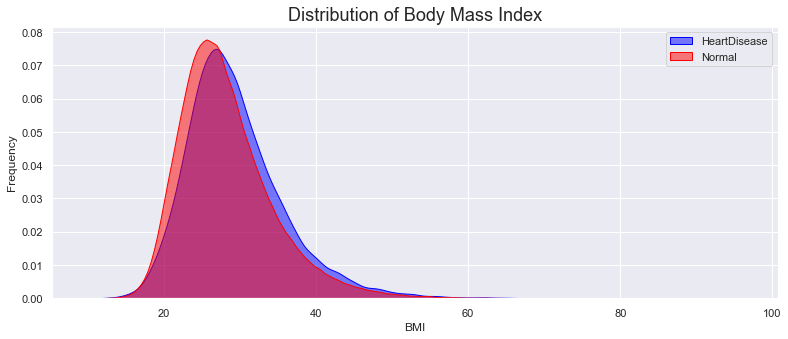

In [21]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart['HeartDisease']==1]['BMI'], alpha=0.5,shade = True, color='blue', label='HeartDisease', ax = ax)
sns.kdeplot(df_heart[df_heart['HeartDisease']==0]['BMI'], alpha=0.5,shade = True, color= 'red', label='Normal', ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')
ax.legend();
plt.show()

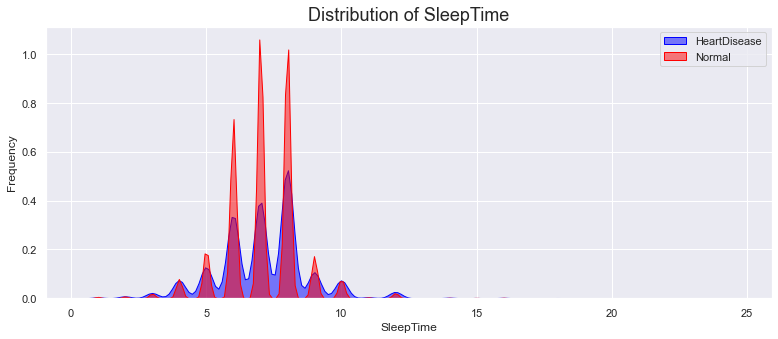

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart['HeartDisease']==1]['SleepTime'], alpha=0.5,shade = True, color='blue', label='HeartDisease', ax = ax)
sns.kdeplot(df_heart[df_heart['HeartDisease']==0]['SleepTime'], alpha=0.5,shade = True, color= 'red', label='Normal', ax = ax)
plt.title('Distribution of SleepTime', fontsize = 18)
ax.set_xlabel('SleepTime')
ax.set_ylabel('Frequency')
ax.legend();
plt.show()

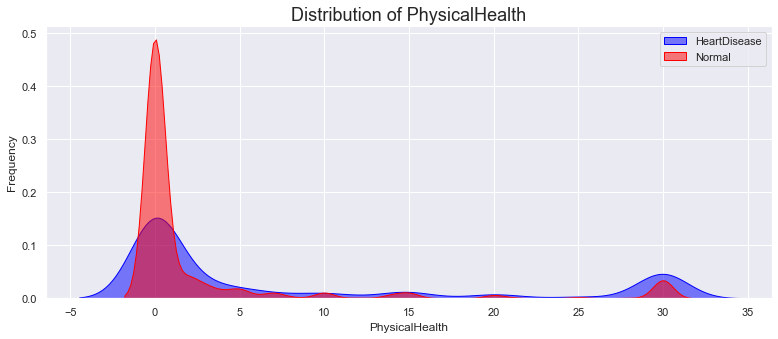

In [23]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart['HeartDisease']==1]['PhysicalHealth'], alpha=0.5,shade = True, color='blue', label='HeartDisease', ax = ax)
sns.kdeplot(df_heart[df_heart['HeartDisease']==0]['PhysicalHealth'], alpha=0.5,shade = True, color= 'red', label='Normal', ax = ax)
plt.title('Distribution of PhysicalHealth', fontsize = 18)
ax.set_xlabel('PhysicalHealth')
ax.set_ylabel('Frequency')
ax.legend();
plt.show()

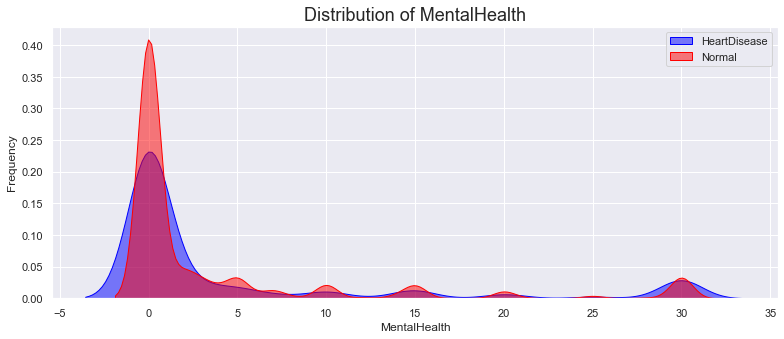

In [24]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart['HeartDisease']==1]['MentalHealth'], alpha=0.5,
            shade = True, color='blue', label='HeartDisease', ax = ax)
sns.kdeplot(df_heart[df_heart['HeartDisease']==0]['MentalHealth'], alpha=0.5,
            shade = True, color= 'red', label='Normal', ax = ax)
plt.title('Distribution of MentalHealth', fontsize = 18)
ax.set_xlabel('MentalHealth')
ax.set_ylabel('Frequency')
ax.legend();
plt.show()

# Modelling

### - Data preprocessing, Standardization, Split, Train and Test, Model comparison

In [25]:
#import the neccessary libraries
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

from sklearn.model_selection import train_test_split

In [26]:
#change the rest of the categorical variables to binary variables to binary var-onehotencoding:ohe
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

cat = df_heart[['AgeCategory', 'Race', 'GenHealth']]
ohe_cat = pd.DataFrame(ohe.fit_transform(cat).toarray())

df_heart = pd.concat([df_heart, ohe_cat], axis=1)  #merge the cat with the rest of df

In [27]:
df_heart = df_heart.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [28]:
df_heart.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
num_var = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']

In [31]:
scaler = StandardScaler()

df_heart[num_var] = scaler.fit_transform(df_heart[num_var])

###### Spliting

In [32]:
#select the features: fts

fts = df_heart.drop(columns=['HeartDisease'], axis=1)

#select the response

response = df_heart['HeartDisease']

#spliting
X_train, X_test, y_train, y_test = train_test_split (fts, response, shuffle=True, test_size=0.2, random_state=42)

In [33]:
#let's examine the shapes of our training and test data. to see 80:20 split

print('Training feature:',  X_train.shape)
print('Testing feature:', X_test.shape)
print('Training target:', y_train.shape)
print('Testing target:', y_test.shape)

Training feature: (255836, 38)
Testing feature: (63959, 38)
Training target: (255836,)
Testing target: (63959,)


 it's key to examine if the nature of the data is the same btw these sets(train and test). i.e.is the fraction of the positive class similar

let's see:

In [34]:
np.mean(y_train)

0.08513657186635189

In [35]:
np.mean(y_test)

0.08743101049109586

The above tells us that the positive class fractions in the training and test data are both btw 86-87%. This is good, as we can say that the training set is representative of the test set.

This implies the class(yes/no) are not too imbalanced,and the datasets is large.

### Modelling

- Logistic Regression

- Decision Tree

In [36]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

###### Building Logistic Regression model

In [37]:
lr_model=LogisticRegression(solver='liblinear')

In [38]:
lr_model

LogisticRegression(solver='liblinear')

In [39]:
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [40]:
#evaluate the model 

lr_eval = evaluate_model(lr_model, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.9137728857549368
Precision: 0.5369836695485111
Recall: 0.09996423462088698
Area Under Curve: 0.836451545941615
Confusion Matrix:
 [[57885   482]
 [ 5033   559]]


###### Building the Decision Tree  model

In [41]:
# Building Decision Tree model 
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8638033740364921
Precision: 0.23590177815410668
Recall: 0.24910586552217454
Area Under Curve: 0.5871874915208348
Confusion Matrix:
 [[53855  4512]
 [ 4199  1393]]


### Comparison

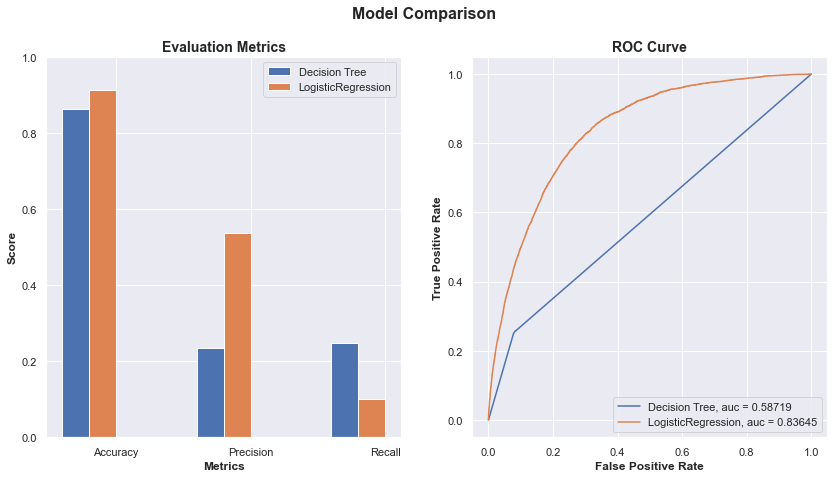

In [42]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='LogisticRegression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='LogisticRegression, auc = {:0.5f}'.format(lr_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


This looks a little closer to an ROC curve that we'd like to see: it's a bit further
from the random chance line.

- The accuracy of both models are a bit similar, as they show both 86%, 95%, meaning the model predictive power is good.
- The precison call of the Logistic model was able to predict more accurately the positive class. Than Decision Tree